In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r'C:\Users\Omkar\Desktop\Practice\Datasets\Customer Clustering\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df['Gender'].value_counts().to_dict()

{'Female': 112, 'Male': 88}

In [5]:
df['Gender'].replace({'Female': 0, 'Male': 1},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
x=df.drop('CustomerID',axis=1)
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [9]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [10]:
model=KMeans()
model.fit(x_scaled)

C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [11]:
model.predict(x_scaled)

array([7, 7, 6, 6, 6, 6, 0, 6, 1, 6, 1, 6, 0, 6, 4, 7, 6, 7, 1, 6, 7, 7,
       0, 7, 0, 7, 0, 7, 0, 6, 1, 6, 1, 7, 0, 6, 0, 6, 0, 6, 0, 7, 1, 6,
       0, 6, 0, 6, 6, 6, 0, 7, 6, 1, 0, 1, 0, 1, 6, 1, 1, 7, 0, 0, 1, 7,
       0, 0, 7, 6, 1, 0, 0, 0, 1, 7, 0, 7, 6, 0, 1, 7, 1, 0, 6, 1, 0, 6,
       6, 0, 0, 7, 1, 0, 6, 7, 0, 6, 1, 7, 6, 0, 1, 7, 1, 6, 0, 1, 1, 1,
       1, 6, 0, 7, 6, 6, 0, 0, 0, 0, 7, 0, 0, 3, 6, 2, 4, 3, 1, 3, 4, 3,
       6, 2, 4, 2, 5, 3, 4, 2, 5, 3, 6, 2, 4, 3, 4, 2, 5, 3, 4, 3, 5, 2,
       5, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 5, 3, 4, 3, 4, 3, 5, 2,
       4, 3, 4, 3, 5, 2, 4, 2, 5, 3, 5, 3, 5, 2, 5, 2, 4, 2, 5, 2, 5, 3,
       4, 3])

In [12]:
model.labels_             ## Labels of each point

array([7, 7, 6, 6, 6, 6, 0, 6, 1, 6, 1, 6, 0, 6, 4, 7, 6, 7, 1, 6, 7, 7,
       0, 7, 0, 7, 0, 7, 0, 6, 1, 6, 1, 7, 0, 6, 0, 6, 0, 6, 0, 7, 1, 6,
       0, 6, 0, 6, 6, 6, 0, 7, 6, 1, 0, 1, 0, 1, 6, 1, 1, 7, 0, 0, 1, 7,
       0, 0, 7, 6, 1, 0, 0, 0, 1, 7, 0, 7, 6, 0, 1, 7, 1, 0, 6, 1, 0, 6,
       6, 0, 0, 7, 1, 0, 6, 7, 0, 6, 1, 7, 6, 0, 1, 7, 1, 6, 0, 1, 1, 1,
       1, 6, 0, 7, 6, 6, 0, 0, 0, 0, 7, 0, 0, 3, 6, 2, 4, 3, 1, 3, 4, 3,
       6, 2, 4, 2, 5, 3, 4, 2, 5, 3, 6, 2, 4, 3, 4, 2, 5, 3, 4, 3, 5, 2,
       5, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 5, 3, 4, 3, 4, 3, 5, 2,
       4, 3, 4, 3, 5, 2, 4, 2, 5, 3, 5, 3, 5, 2, 5, 2, 4, 2, 5, 2, 5, 3,
       4, 3])

In [13]:
df['Clusters']=model.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15,39,7
1,2,1,21,15,81,7
2,3,0,20,16,6,6
3,4,0,23,16,77,6
4,5,0,31,17,40,6
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,5
197,198,1,32,126,74,3
198,199,1,32,137,18,4


In [14]:
wcss=model.inertia_               ## Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
wcss

12.24545896814373

#### Elbow Method For Finding Best Number of Clusters

In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

array=np.arange(3,20,1)
wcss=[]
for i in array:
    model=KMeans(n_clusters=i)
    model.fit(x_scaled)
    wcss.append(model.inertia_)

In [16]:
import matplotlib.pyplot as plt

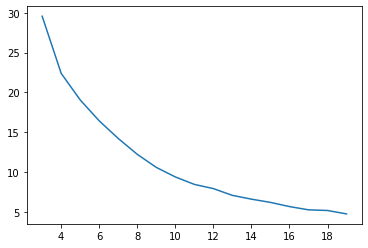

In [17]:
plt.plot(array,wcss)

In [18]:
best_model=KMeans(n_clusters=16)
best_model.fit(x_scaled)

KMeans(n_clusters=16)

In [19]:
best_model.predict(x_scaled)

array([ 1,  8, 13,  9, 13,  9, 13,  9,  2,  9,  2,  9, 13,  9,  7,  8, 13,
        8,  7,  9,  7,  8, 13,  8, 13,  8, 13,  8, 13,  9,  2,  9,  2,  8,
       13,  9, 13,  9, 13,  9, 12,  8,  7,  4, 13,  9,  0,  4,  4,  4,  0,
        8,  4, 11,  0,  7,  0, 11,  4,  7, 11,  1, 12,  0, 11,  1,  0, 12,
        1,  4, 11,  0, 12, 12, 11,  1,  0,  7,  4,  0, 11,  7, 11,  0,  4,
        7,  0,  4,  4,  0, 12,  1,  7,  0,  4,  1,  0,  4,  7,  1,  4,  0,
       11,  1,  7,  4, 12,  7, 11, 11, 11,  4,  0,  1,  4,  4, 12,  0,  0,
        0,  1,  0,  0, 14,  4,  3,  7, 14,  2, 14, 10, 14,  4,  3,  6,  3,
       15, 14,  6,  3, 15, 14,  4,  3,  6, 14,  7,  3,  5, 14, 10, 14, 15,
        3, 15,  3, 10,  3, 10,  3, 15,  3,  6,  3, 10,  3, 10,  3,  5, 14,
       10, 14, 10, 14, 15,  3, 10, 14, 10, 14,  5,  3, 10,  3,  5, 14, 15,
       14,  5,  3,  5,  3, 10,  3,  5,  3,  5, 14, 10, 14])

In [20]:
df['Clusters']=best_model.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,1,19,15,39,1
1,2,1,21,15,81,8
2,3,0,20,16,6,13
3,4,0,23,16,77,9
4,5,0,31,17,40,13
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,5
197,198,1,32,126,74,14
198,199,1,32,137,18,10


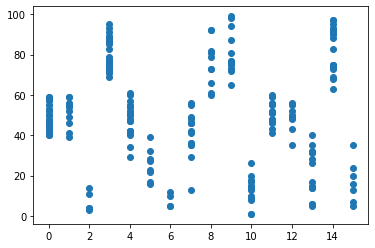

In [21]:
plt.scatter(df['Clusters'],df['Spending Score (1-100)'])

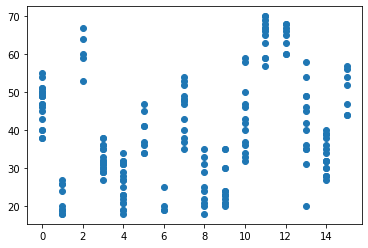

In [22]:
plt.scatter(df['Clusters'],df['Age'])

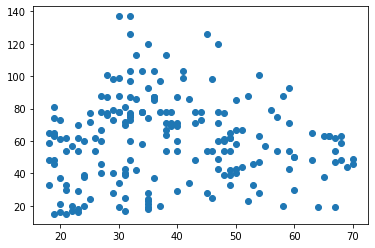

In [23]:
plt.scatter(df['Age'],df['Annual Income (k$)'])

In [24]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Customer Clustering\artifacts\scaler.pkl','wb') as file:
    pkl.dump(scaler,file)

In [25]:
with open(r'C:\Users\Omkar\Desktop\Practice\Datasets\Customer Clustering\artifacts\model.pkl','wb') as file1:
    pkl.dump(best_model,file1)